# Generating Input file

## Generating aggregates with Random Sequential Adsorption

In [1]:
import numpy as np

from gen_sieve_curve import * 
from circle_Compaction import *
from circle_RSA import *

ModuleNotFoundError: No module named 'gen_sieve_curve'

### Generating random sieve curve within Class 1 & 2 of SBB Gleisschotter

In [3]:
# Input values: 
# Sieve curve according to Gleisschotter 32/50, class 1 & 2
# [[mm],lower bound, upper bound]
sieve_63 = np.array([0.063,1,1])
sieve_50 = np.array([0.050,0.7,0.99])    
sieve_40 = np.array([0.040,0.3,0.65])     
sieve_31 = np.array([0.0315,0.01,0.25])
sieve_22 = np.array([0.0224,0.01,0.03])
sieve_low_limit = np.array([0.018,0,0])
grad_curve_bounds = np.vstack([sieve_63,sieve_50,sieve_40,sieve_31,sieve_22,sieve_low_limit])

In [4]:
grad_curve = pick_rand_curve(grad_curve_bounds)
grad_curve_conv = convert_sieve_curve(grad_curve)

### Generating 2D aggregates with RSA

In [5]:
# Input values:

# Required void after RSA
# NOTE: 0.41 - 0.45 seems reasonable
required_void = 0.44

# Sample dimensions [m]:
height_sample = 0.5
width_sample = 1.5

# Min distance between aggregates [m]:
tol = 0

#Maximum runtime until timeout [s]:
timeout = 120 

In [6]:
# Run RSA Algorithm
cirList, cur_void = rsa_circle_graded(grad_curve_conv, required_void,height_sample,width_sample,tol,timeout)

------------------------------------------------
Found a solution in  1.25  seconds
Current void:  0.4398
------------------------------------------------


### Compacting aggregates

In [6]:
#Insert run pattern, where even index discribes #vertical compactions and odd #horizontal compactions
#For example [2,2,1]: 2 vertical, 2 horizontal and then 1 vertical
run_pattern = [3]

#Insert where gif should be saved, MUST have same shape as run_pattern
#For example [True, True, False]: Saves the latest gif in each direction (vertical / horizontal)
save_gif = [False]

#Show plots after each run?
show_plot = True

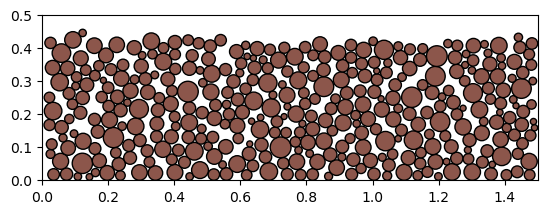

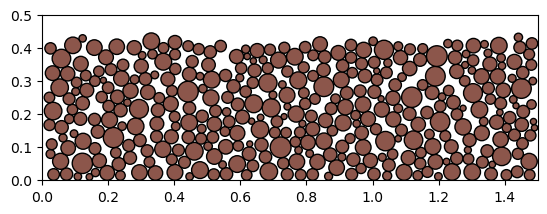

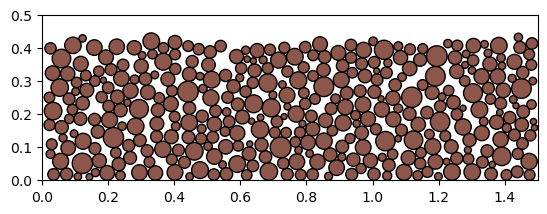

0.3555

In [7]:
# Run Compaction Algorithm
comp_cirList = run_comp_pattern(cirList,height_sample,width_sample,sieve_low_limit[0],cur_void,run_pattern,save_gif,show_plot)

# Calculate new void
calc_void(comp_cirList)

### Save compacted aggregates into txt file

In [18]:
np.savetxt('cirList.txt',comp_cirList)

### Create Input (.in) file for gprMax

In [ ]:
# Filename of the Input file:
filename_input = 'cirList_test.txt'

# Title of A-Scan: 
title_Ascan = 'A-Scan from circular ballast - 0 moist - 0 degraded '

# Domain size:
domain = '1.6 1 0.002'

# Spatial resolution:
spatial_res = '0.002 0.002 0.002'

# Time windows:
time_window = 3e-9

#

In [ ]:
f = open(filename_input,'w+')



# Run gprMax

In [8]:
import os
os.chdir('C:/Users/lukas/OneDrive/Dokumente/GitHub/GPR-repo')
import gprMax

gprMax.run('lukas/RSA/Circles/circle_test.in',geometry_only=True)


=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.6 (Big Smoke)

 Copyright (C) 2015-2022: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

In [11]:
import h5py
os.chdir('C:/Users/lukas/OneDrive/Dokumente/GitHub/GPR-repo/lukas/RSA/Circles')

f = h5py.File('sample_hpf5.h5','r')

f['data']

<HDF5 dataset "data": shape (200, 200, 1), type "<i2">